## Pebble Post Cookie Match Data Analysis

Let's import some of the necessary libraries to start our analysis.

In [107]:
import zipfile
import pandas as pd
from pandas.errors import EmptyDataError
import matplotlib.pyplot as plt 
import seaborn as sns

Now, we will get the data from each zipped folder and save it into two data frames one for the event_sample and one for the cookie_match_sample. 

In [18]:
zfe = zipfile.ZipFile(r"C:\Users\uelif\Documents\jobs\Interview\takehome\event_sample.zip")
dfe = pd.DataFrame()
for f in zfe.namelist():
    try:
        df = pd.read_csv(zfe.open(f))
    except EmptyDataError:
        df = pd.DataFrame()
    dfe=pd.concat([dfe,df],ignore_index=True)

In [20]:
#info on the event_sample dataframe
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389990 entries, 0 to 1389989
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   brand_id       1389990 non-null  int64 
 1   ppid           1389989 non-null  object
 2   event_type     1389990 non-null  object
 3   device_family  1389988 non-null  object
 4   date           1389990 non-null  object
dtypes: int64(1), object(4)
memory usage: 53.0+ MB


In [21]:
zfcm = zipfile.ZipFile(r"C:\Users\uelif\Documents\jobs\Interview\takehome\cookie_match_sample.zip")
dfcm = pd.DataFrame()
for f in zfcm.namelist():
    try:
        df = pd.read_csv(zfcm.open(f))
    except EmptyDataError:
        df = pd.DataFrame()
    dfcm=pd.concat([dfcm,df],ignore_index=True)

In [22]:
#info on the cookie_match_sample dataframe
dfcm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031659 entries, 0 to 1031658
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ppid        1031659 non-null  object
 1   matched_id  1031659 non-null  object
 2   date        1031659 non-null  object
dtypes: object(3)
memory usage: 23.6+ MB


Cookie_match_sample dataframe does not have any null entries, but event_sample dataframe has a few. We will drop those observations since taking those out will not have much impact on our analysis of close to a million observations. Also, we will drop duplicates if there are any from both data frames.

In [72]:
dfe.dropna(inplace=True)
dfe.drop_duplicates(inplace=True)
dfcm.drop_duplicates(inplace=True)

**Problem 1:** Find the number of events and number of matched events for each brand for each day.

In [75]:
#number of events for each brand for each day
event_groups = dfe.groupby(['brand_id','date']).agg({'ppid':'count'})
event_groups.columns=['event_count']
print(event_groups)

                     event_count
brand_id date                   
1034     2018-03-15         1568
         2018-03-16         1424
         2018-03-17         1135
         2018-03-18         1220
         2018-03-19         1764
         2018-03-20         1586
         2018-03-21         1392
         2018-03-22         1409
         2018-03-23         1419
         2018-03-24         1185
         2018-03-25         1362
         2018-03-26         1854
         2018-03-27         1535
         2018-03-28         1481
1101     2018-03-15        10710
         2018-03-16        10837
         2018-03-17        10970
         2018-03-18        12590
         2018-03-19        12107
         2018-03-20        11936
         2018-03-21        11997
         2018-03-22        11894
         2018-03-23        11344
         2018-03-24        11018
         2018-03-25        12240
         2018-03-26        11595
         2018-03-27        10884
         2018-03-28        10400
1472     2

In [76]:
#number of matched events for each brand for each day
mergedcookies = pd.merge(dfe,dfcm,on=['ppid','date'],how='inner')
matched_groups = mergedcookies.groupby(['brand_id','date']).agg({'ppid':'count'})
matched_groups.columns=['matched_event_count']
print(matched_groups)

                     matched_event_count
brand_id date                           
1034     2018-03-15                   18
         2018-03-16                   12
         2018-03-17                    6
         2018-03-18                    8
         2018-03-19                   11
         2018-03-20                   12
         2018-03-21                   12
         2018-03-22                    9
         2018-03-23                   12
         2018-03-24                    6
         2018-03-25                    6
         2018-03-26                   13
         2018-03-27                    6
         2018-03-28                    9
1101     2018-03-15                  249
         2018-03-16                  249
         2018-03-17                  249
         2018-03-18                  294
         2018-03-19                  241
         2018-03-20                  227
         2018-03-21                  239
         2018-03-22                  228
         2018-03

**Problem 2:** Find the average number of events for each day of the week for each brand and visualize it with a plot.

In [140]:
#add a column to event_sample dataframe that shows the day of the week
datetime = pd.to_datetime(dfe['date'])
dfe['day'] = datetime.dt.day_name()

#group by the brand_id and the day of the week and count events
tempdf = dfe.groupby(['brand_id','day','date']).agg({'ppid':'count'}).reset_index()
event_avrg = tempdf.groupby(['brand_id','day']).agg({'ppid':'mean'}).reset_index()
event_avrg.columns = ['brand_id','day','mean_events']
print(event_avrg)

    brand_id        day  mean_events
0       1034     Friday       1421.5
1       1034     Monday       1809.0
2       1034   Saturday       1160.0
3       1034     Sunday       1291.0
4       1034   Thursday       1488.5
5       1034    Tuesday       1560.5
6       1034  Wednesday       1436.5
7       1101     Friday      11090.5
8       1101     Monday      11851.0
9       1101   Saturday      10994.0
10      1101     Sunday      12415.0
11      1101   Thursday      11302.0
12      1101    Tuesday      11410.0
13      1101  Wednesday      11198.5
14      1472     Friday      44386.5
15      1472     Monday      48986.5
16      1472   Saturday      41992.0
17      1472     Sunday      48650.0
18      1472   Thursday      46066.0
19      1472    Tuesday      45758.0
20      1472  Wednesday      44702.0


Text(0, 0.5, 'Average Number of Events')

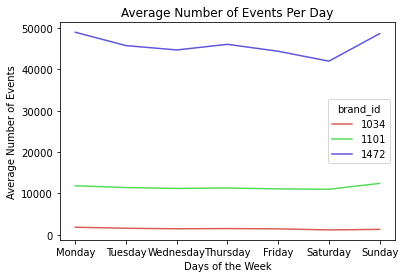

In [141]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# set categorical order
event_avrg['day'] = pd.Categorical(event_avrg['day'], categories=days, ordered=True)

#plot
sns.lineplot(x='day', y='mean_events', data=event_avrg, hue='brand_id',
             palette=sns.color_palette("hls",len(event_avrg['brand_id'].unique())))

plt.title('Average Number of Events Per Day')
plt.xlabel('Days of the Week')
plt.ylabel('Average Number of Events')


**Problem 3:** Any interesting observations about the sample data?

So far we have worked mostly on event_sample data, and as we can see in the above figure, the average number of user visits to brand websites is higher on Sundays and Mondays especially for brand_id 1472, while it is much less on Saturdays. For the other two brands although we can see a similar trend on Saturday, Sunday and Monday, the changes are not as dramatic as in the first brand. In general average user visits is steady throughout the week for brand_id 1101 and 1034. Brand 1034 gets the lowest number of user visits in general and brand_id 1472 gets the highest number of average user visits during the recorded two weeks. If we go back to Problem 1 and compare the two dataframes for event_counts and matched_event_counts, we can see that only a small fraction of events are matched. The percentage of events that are matched increases as we move to the brands that has higher user visits. 